In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv('kc_house_data.csv')
df.drop('id', axis=1, inplace=True)

In [2]:
df.yr_renovated.fillna(0.0, inplace=True)


In [3]:
df.drop(df[df.bedrooms > 7].index, inplace=True)
df.drop(df[df.grade > 11].index, inplace=True)
df.drop(df[df.grade ==4].index, inplace=True)
df.drop(df[df.sqft_living > 6000].index, inplace=True)
df.drop(df[df.price > 3850000.0].index, inplace=True)
df.drop(df[df.sqft_lot > 40000].index, inplace=True)
df.drop(df[df.bathrooms > 3.25].index, inplace=True)
df.drop(df[df.bathrooms < 1.00].index, inplace=True)
df.drop(df[df.floors > 2.0].index, inplace=True)
df.drop(df[df.condition < 3].index, inplace=True)
df.drop('waterfront', axis=1, inplace=True) # dropped because there were less than 150 positive values
df.drop('view', axis=1, inplace=True)# dropped because 90% of values were 0.0

In [4]:
pd.to_datetime(df.date)

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
6       2014-06-27
7       2015-01-15
8       2015-04-15
9       2015-03-12
10      2015-04-03
11      2014-05-27
12      2014-05-28
13      2014-10-07
14      2015-03-12
15      2015-01-24
16      2014-07-31
17      2014-05-29
18      2014-12-05
19      2015-04-24
20      2014-05-14
22      2014-07-03
23      2014-05-16
24      2014-11-20
25      2014-11-03
26      2014-06-26
27      2014-12-01
28      2014-06-24
29      2015-03-02
30      2014-11-10
32      2014-06-24
           ...    
21547   2014-10-20
21548   2014-10-09
21549   2015-02-26
21550   2015-04-23
21554   2014-05-13
21556   2014-07-07
21559   2014-11-11
21561   2015-01-23
21562   2014-06-23
21563   2014-05-29
21564   2014-10-03
21565   2015-05-04
21566   2014-11-12
21567   2014-06-10
21568   2014-12-02
21569   2014-08-28
21572   2014-11-13
21573   2014-09-10
21575   2014-10-02
21578   2014-10-17
21580   2014-08-13
21581   2015

In [5]:
df.sqft_basement.replace(to_replace='?', value=100000.0, inplace=True)
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement.replace(to_replace=100000.0, value=np.median(df.sqft_basement), inplace=True)

In [6]:
pd.get_dummies(df.bedrooms, prefix='bed')
pd.get_dummies(df.bathrooms, prefix='bath')
pd.get_dummies(df.floors, prefix='flr')
pd.get_dummies(df.condition, prefix='cond')
pd.get_dummies(df.grade, prefix='grd')

,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
6,0,0,1,0,0,0,0
7,0,0,1,0,0,0,0
8,0,0,1,0,0,0,0
9,0,0,1,0,0,0,0
10,0,0,0,1,0,0,0


In [7]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df.grade.value_counts().head()

7     8381
8     5083
9     1996
6     1878
10     645
Name: grade, dtype: int64

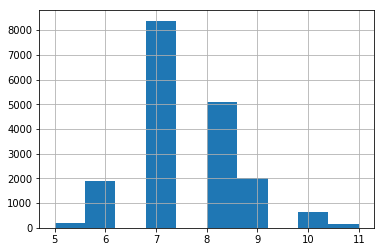

In [30]:
df.grade.hist()

In [10]:
df_pred1 = df.loc[:, ['yr_built', 'bedrooms', 'sqft_living', 'grade', 'sqft_living15', 'sqft_lot', 'bathrooms']]

In [11]:
df_pred2 = df_pred1.copy()

## Predictor values pre-log
* df_pred1 are **some** of the predictor values from the main dtaframe that are in their raw state.

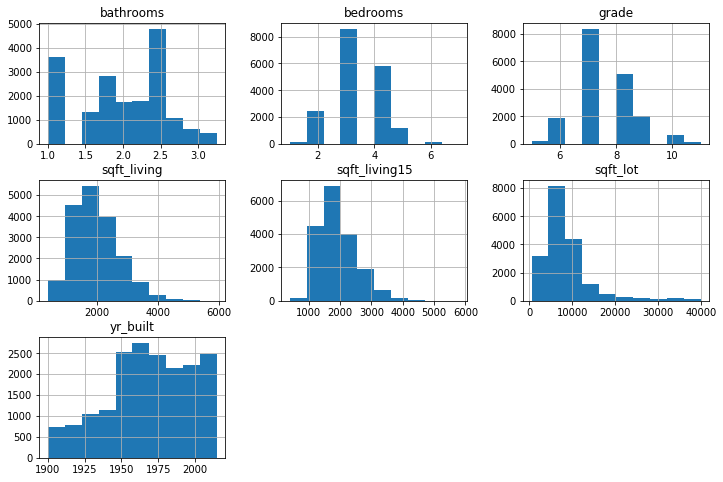

In [12]:
# plt.figure(figsize=(15,8))
df_pred1.hist(figsize=(12,8))
plt.show()

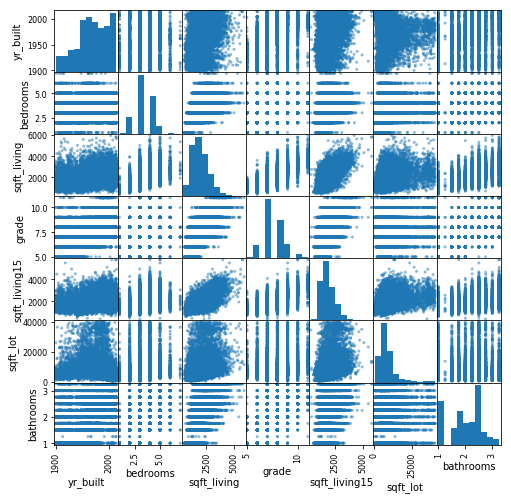

In [7]:
pd.plotting.scatter_matrix(df_pred1, figsize=(8,8))
plt.show()

In [11]:
df.long.head()

0   -122.257
1   -122.319
2   -122.233
3   -122.393
4   -122.045
Name: long, dtype: float64

In [12]:
df.long = np.log(df.long)
df.long.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: long, dtype: float64

## Predictor values post-log
* df_pred2 refers to the dataframe of values after the continuous variables have been log-transformed. 

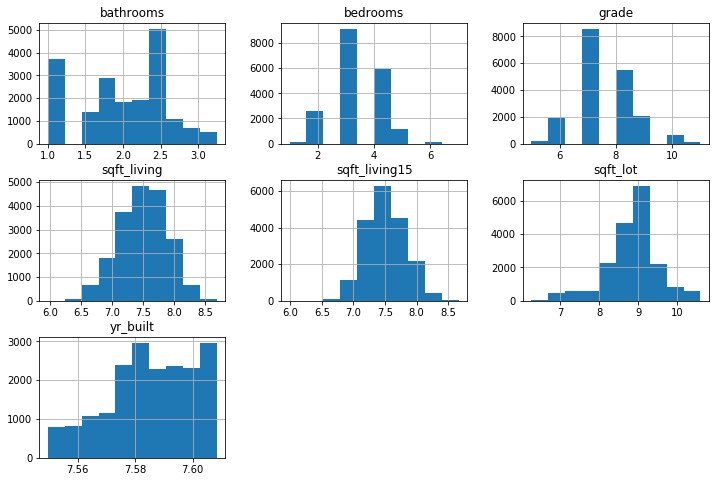

In [8]:
things = ['sqft_living', 'sqft_living15', 'sqft_lot', 'yr_built']
for thing in things:
    df_pred2[thing] = df_pred2[thing].map(lambda x: np.log(x))
df_pred2.hist(figsize=(12,8))
plt.show()

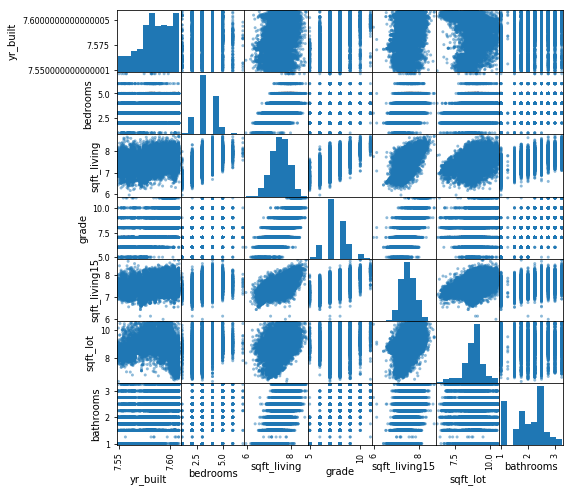

In [9]:
pd.plotting.scatter_matrix(df_pred2, figsize=(8,8));

In [10]:
df_pred1.corr()

,yr_built,bedrooms,sqft_living,grade,sqft_living15,sqft_lot,bathrooms
yr_built,1.000000,0.137245,0.287245,0.433719,0.301766,0.008526,0.529918
bedrooms,0.137245,1.000000,0.593403,0.319041,0.394856,0.173605,0.471323
sqft_living,0.287245,0.593403,1.000000,0.704954,0.752775,0.290191,0.683564
grade,0.433719,0.319041,0.704954,1.000000,0.682813,0.179625,0.601397
sqft_living15,0.301766,0.394856,0.752775,0.682813,1.000000,0.333943,0.529411
sqft_lot,0.008526,0.173605,0.290191,0.179625,0.333943,1.000000,0.066071
bathrooms,0.529918,0.471323,0.683564,0.601397,0.529411,0.066071,1.000000


In [15]:
def create_plot(variable):
    plt.xlabel(variable)
    plt.ylabel('price')
    return plt.scatter(x=df[variable], y=df['price'], alpha=.2);

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [13]:
np.corrcoef(df['sqft_living'], df['price'])

array([[1.        , 0.61928086],
       [0.61928086, 1.        ]])

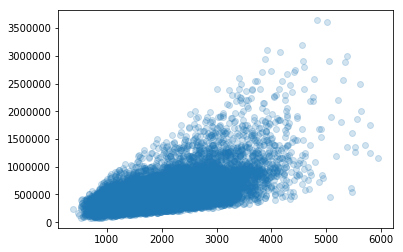

In [14]:
create_plot('sqft_living')

In [52]:
df2 = df.copy()

In [36]:
print(len(df2.loc[df2.loc[:, 'price'] > 1250000.0]))

422


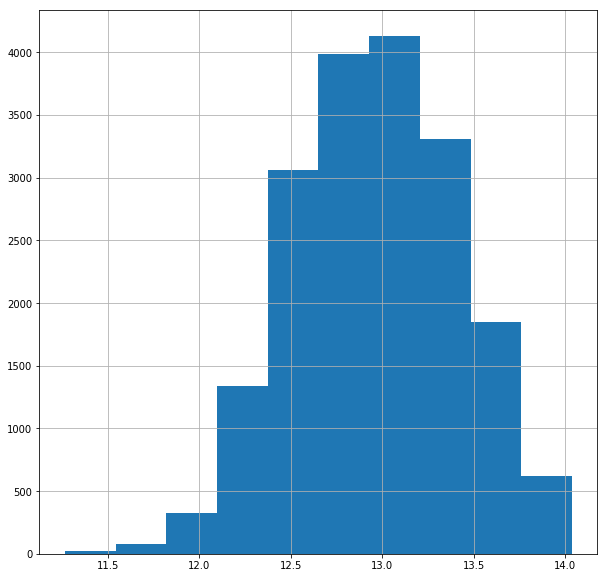

In [40]:
df2.price.hist(figsize=(10,10))

In [39]:
# df2.drop(df[df.price > 1250000.0].index, inplace=True)
df2['price'] = np.log(df2['price'])


In [51]:
df2.drop(df[['date', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'zipcode']], axis=1, inplace=True)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0


# Questions for 1-on-1

**My DataFrames**
* **raw_df**: the dataframe right after it was read-in
* **df**: the dataframe after it had been pre-processed
* **df_pred1**: a dataframe consisting of the target, as well as variables I thought would be good predictors
* **df_pred_test**: the same dataframe as above, but the target has been log-transformed
* **df_pred_test2**: the same dataframe as above, but the target has been dropped so that only the predictors are left

### Did I sufficiently pre-process my data so that it could be used in a model?

* dropped columns
* dropped outliers
* changed date to a datetime object
* changed ft<sup>2</sup> baement to float by replacing '?' with number, changing to float, and replacing number with mean of vector value
* dealt with NaN’s
* got dummy variables for categorical data
* log-transformed two predictor variables: soft living & lot

### When I use the dummy data it blows up my visualizations so that they’re hard to interpret. Is there a way around this?

### My model numbers are all over the place, but I don't know what could be leading to those results. 

### I excluded data by process of elimination (below) and then I began to experiment with OLS regression models with the data that was left, as well as data that seemed intuitively to me to be a good predictor. Is this a good line of thinking?

### It seems like data can’t be used:

* zipcode: has no linear relationship with target
* long: has no linear relationship with target 
* lat: has no linear relationship with target
* sqft_living15: colinear with sqft_living
* sqft_lot15: colinear with sqft_lot 
* sqft_above: colinear with sqft_living 
* sqft_basement: has too few values 
* yr_built: has no linear relationship with target
* yr_renovated: has too few values
> Instead of dropping this data, is there a way I could incorporate it with my model or is it best to leave it gone?

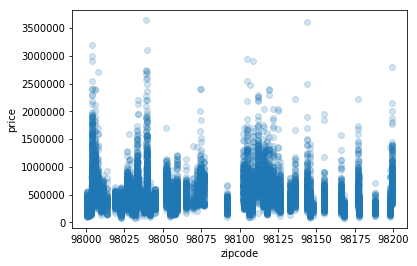

In [22]:
create_plot('zipcode')

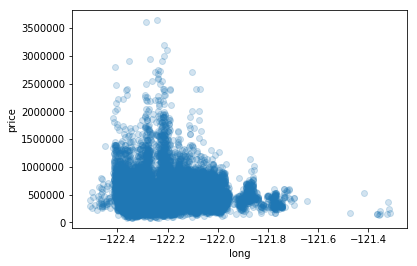

In [23]:
create_plot('long')

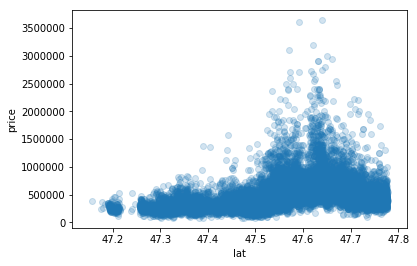

In [26]:
create_plot('lat')

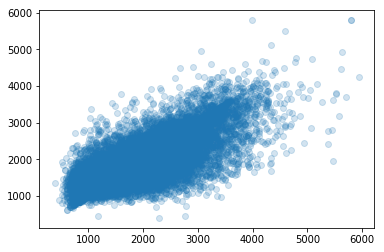

In [27]:
plt.scatter(df.sqft_living, df.sqft_living15, alpha=.2)

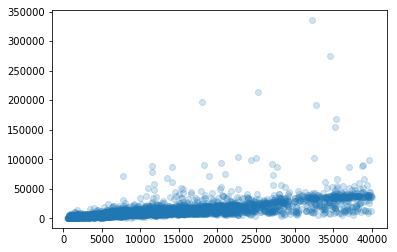

In [28]:
plt.scatter(df.sqft_lot, df.sqft_lot15, alpha=.2)

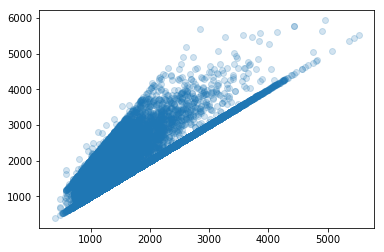

In [29]:
plt.scatter(df.sqft_above, df.sqft_living, alpha=.2)

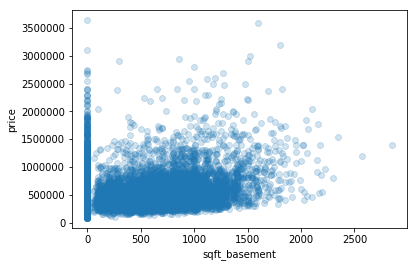

In [32]:
create_plot('sqft_basement')

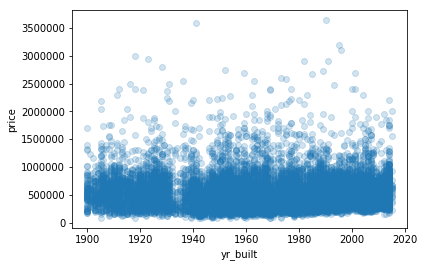

In [33]:
create_plot('yr_built')

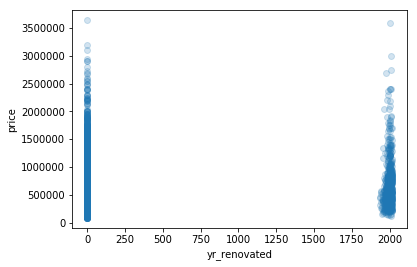

In [34]:
create_plot('yr_renovated')

In [40]:
df.yr_renovated.value_counts().head()

0.0       17704
2014.0       63
2013.0       27
2003.0       25
2005.0       23
Name: yr_renovated, dtype: int64